In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
import numpy as np

# Sequential Feature Selector

In [2]:
df = pd.read_csv("data_final_cleaned.csv")

df = df.drop(columns=["rue_1", "rue_2", "date_", "x", "y", "int_no"])
df.head()

,all_pedest,pi,fi,fli,fri,fti,cli,cri,cti,acc,...,total_lane,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,borough,acc_rate
0,0,0.0,2603.827881,0.000000,0.000000,2603.827881,0.0,0.0,0.0,0,...,5,0,0,0,0,0,1,3932.076904,C¶te-des-Neiges-Notre-Dame-de-Graces,0.0
1,0,0.0,7816.051758,1251.560547,777.997070,5786.494141,0.0,0.0,0.0,0,...,4,0,0,1,0,0,1,2097.060059,Sud-Ouest,0.0
2,0,0.0,8896.671875,282.226379,54.202415,8560.243164,0.0,0.0,0.0,0,...,4,0,0,2,1,0,0,2112.164062,Ville-Marie,0.0
3,0,0.0,10932.754883,1303.225952,1884.360840,7745.167969,0.0,0.0,0.0,0,...,2,0,0,0,0,0,0,3172.770020,Sud-Ouest,0.0
4,0,0.0,10479.296875,1227.449951,1450.413696,7801.432617,0.0,0.0,0.0,0,...,2,0,0,0,0,0,0,3525.406006,Sud-Ouest,0.0


In [3]:
# Convert columns with only 2 unique values to binary
for col in df.columns:
    if (df["all_pedest"].unique() == np.array([0, 1])).all():
        df[col] = df[col].astype(bool)

In [4]:
df = pd.read_csv("data_final_cleaned.csv")

df = df.drop(columns=["rue_1", "rue_2", "date_", "x", "y", "int_no"])

# One hot encoding
enc = OneHotEncoder()
enc.fit(df[["borough"]])
onehot = enc.transform(df[["borough"]]).toarray()
df = df.drop(columns=["borough"])
df = pd.concat([df, pd.DataFrame(onehot, columns=enc.get_feature_names_out())], axis=1)


# Standardize
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = df_train.drop(columns=["acc_rate"])
y_train = df_train["acc_rate"]

In [5]:
X_train

,all_pedest,pi,fi,fli,fri,fti,cli,cri,cti,acc,...,borough_Plateau-Mont-Royal,borough_Pointe-aux-Trembles-RiviÞres-des-Prairies,borough_Rosemont-La-Petite-Patrie,borough_Saint-Laurent,borough_St-LÚonard,borough_Sud-Ouest,borough_Verdun,borough_Ville-Marie,borough_Villeray-Saint-Michel-Parc-Extension,borough_Westmount
898,-0.256421,-0.334353,-0.406893,-0.596247,-0.304827,-0.244395,-0.425989,-0.250118,-0.373447,-0.384345,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,-0.320872,-0.069655
244,-0.256421,-0.454707,-1.101948,-0.389625,-0.402059,-1.131282,-0.388436,-0.409207,-0.484213,-0.699116,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,-0.320872,-0.069655
710,-0.256421,-0.508635,0.315784,1.555929,0.475660,-0.187776,-0.191813,-0.398996,-0.477358,-0.384345,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,3.116511,-0.069655
1190,-0.256421,-0.304111,-0.419174,-0.715713,-0.537657,-0.156630,-0.421677,-0.412951,-0.178026,-0.069574,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,-0.320872,-0.069655
720,-0.256421,0.268185,-0.428688,-0.389299,-0.380081,-0.306793,0.144240,-0.120096,0.294695,-0.699116,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,3.116511,-0.069655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.256421,-0.444558,0.924717,-0.281074,-0.432612,1.349351,-0.299307,-0.420778,-0.265733,-0.069574,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,3.116511,-0.069655
1294,-0.256421,-0.275742,0.216553,0.128737,-0.463031,0.369450,-0.174315,-0.376563,-0.235234,-0.069574,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,3.116511,-0.069655
860,-0.256421,0.163375,0.532310,-0.006063,0.310831,0.566084,0.382737,0.392587,0.430041,-0.699116,...,2.976984,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,-0.320872,-0.069655
1459,-0.256421,-0.464199,1.527079,0.518439,-0.323284,1.836469,-0.350190,-0.398618,-0.178158,0.559968,...,-0.335910,-0.187031,-0.332936,-0.244322,-0.191592,-0.201889,-0.093048,-0.423966,3.116511,-0.069655


In [21]:
nb_of_boroughs = len([c for c in df.columns if c.startswith("borough")])
feature_groups = [[i] for i in range(len(X_train.columns))][:-nb_of_boroughs]
feature_groups.append(
    list(range(len(X_train.columns) - nb_of_boroughs, len(X_train.columns)))
)
# feature_groups

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66]]

In [26]:
model = linear_model.LinearRegression()
sfs = SFS(
    model,
    k_features=(1, 15),
    # scoring="neg_mean_squared_error",
    forward=False,
    floating=True,
    cv=5,
    feature_groups=feature_groups,
)
selected_features = sfs.fit(X_train, y_train)

In [27]:
selected_features.k_feature_names_

('pi',
 'cri',
 'cti',
 'acc',
 'number_of_',
 'half_phase',
 'ped_countd',
 'lt_restric',
 'south_ped',
 'curb_exten',
 'distdt',
 'borough_?le-Bizard-Sainte-GeneviÞve',
 'borough_Ahuntsic-Cartierville',
 'borough_Anjou',
 'borough_Beaconsfield',
 'borough_C¶te-Saint-Luc',
 'borough_C¶te-des-Neiges-Notre-Dame-de-Graces',
 'borough_Dollard-des-Ormeaux',
 'borough_Dorval',
 'borough_Hampstead',
 'borough_Kirkland',
 'borough_Lachine',
 'borough_Lasalle',
 'borough_Mercier-Hochelaga-Maisonneuve',
 'borough_Mont-Royal',
 'borough_MontrÚal-Est',
 'borough_MontrÚal-Nord',
 'borough_Outremont',
 'borough_Pierrefonds-Roxboro',
 'borough_Plateau-Mont-Royal',
 'borough_Pointe-aux-Trembles-RiviÞres-des-Prairies',
 'borough_Rosemont-La-Petite-Patrie',
 'borough_Saint-Laurent',
 'borough_St-LÚonard',
 'borough_Sud-Ouest',
 'borough_Verdun',
 'borough_Ville-Marie',
 'borough_Villeray-Saint-Michel-Parc-Extension',
 'borough_Westmount')

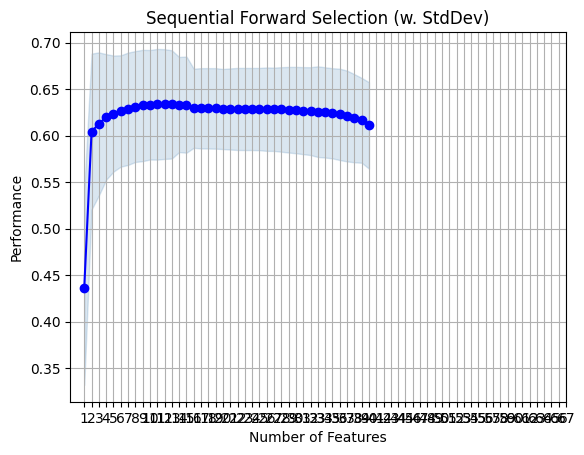

In [28]:
fig1 = plot_sequential_feature_selection(sfs.get_metric_dict(), kind="std_dev")

# plt.ylim([0.8, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

# Lasso

In [32]:
linear_model.LassoCV().fit(X_train, y_train).coef_

array([-6.78747020e-03,  7.10158991e-01,  0.00000000e+00, -0.00000000e+00,
        2.16938534e-02,  0.00000000e+00,  3.97632532e-02,  0.00000000e+00,
       -1.59400117e-01, -4.05728097e-01,  0.00000000e+00,  2.94446844e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.21260004e-03,  4.67539067e-02, -7.51855282e-03,
       -1.71994912e-02, -0.00000000e+00,  2.24161475e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.35245171e-01,  0.00000000e+00,
        1.94892496e-02,  3.92119290e-03,  8.52599561e-02,  0.00000000e+00,
        0.00000000e+00, -7.94235118e-03,  7.17618063e-03,  1.47544953e-02,
        0.00000000e+00, -1.20698252e-02, -9.23814472e-02,  0.00000000e+00,
       -0.00000000e+00, -6.71170879e-03, -0.00000000e+00, -0.00000000e+00,
       -1.80231681e-03, -0.00000000e+00,  2.05443850e-02,  0.00000000e+00,
        0.00000000e+00, -2.63666330e-03, -3.03352202e-03, -2.08978995e-02,
        0.00000000e+00, -